In [1]:
import numpy as np

In [2]:
data_path = r"C:\Users\jiahu\Desktop\new_radar\data\DeepLearning\signal.npy"
label_path = r"C:\Users\jiahu\Desktop\new_radar\data\DeepLearning\labels.npy"

In [3]:
signals = np.load(data_path)
labels = np.load(label_path)

In [4]:
print(signals[0].shape)
    

(1, 2000)


In [5]:
signal_length = signals.shape[0]
labels_length = labels.shape
print(labels_length)
print(signal_length)

(36000,)
36000


In [6]:
print(labels[35989])

2.0


In [7]:
labels_= {'A':1, 'B':2, 'C':3}


In [8]:
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField


In [9]:

def generate_gasf_gadf_images(signal, image_size=32):
    # Rescale the signal to [0, 1]
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    scaled_signal = (signal - signal_min) / (signal_max - signal_min)

    # Reshape the signal to a 2D array
    reshaped_signal = scaled_signal.reshape(1, -1)

    # Generate Gramian Angular Summation Field (GASF)
    gasf = GramianAngularField(image_size=image_size, method='summation')
    gasf_image = gasf.fit_transform(reshaped_signal)

    # Generate Gramian Angular Difference Field (GADF)
    gadf = GramianAngularField(image_size=image_size, method='difference')
    gadf_image = gadf.fit_transform(reshaped_signal)

    return gasf_image[0], gadf_image[0]

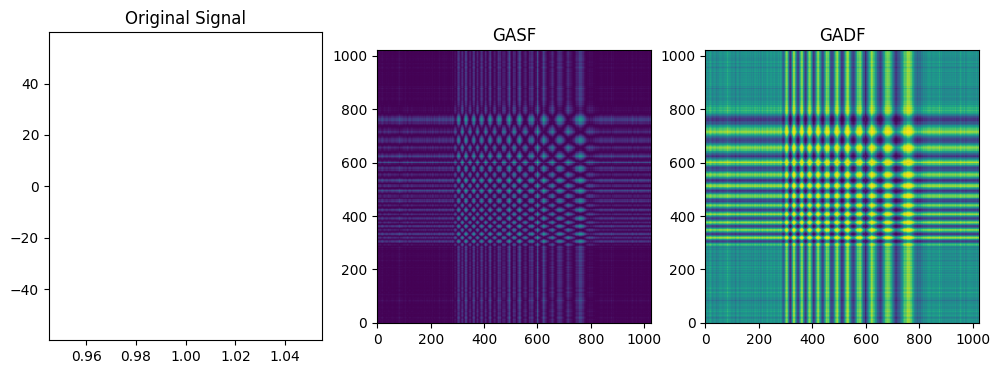

In [10]:
gasf_image, gadf_image = generate_gasf_gadf_images(signals[-1],image_size=1024)
t = np.linspace(1,1,2000)
t = t.reshape(1,2000)
# Plot the original signal, GASF, and GADF
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t, signals[-1])
plt.title('Original Signal')

plt.subplot(1, 3, 2)
plt.imshow(gasf_image, cmap='viridis', origin='lower')
plt.title('GASF')

plt.subplot(1, 3, 3)
plt.imshow(gadf_image, cmap='viridis', origin='lower')
plt.title('GADF')

plt.show()



In [11]:
print(t.shape,signals[0].shape)

(1, 2000) (1, 2000)


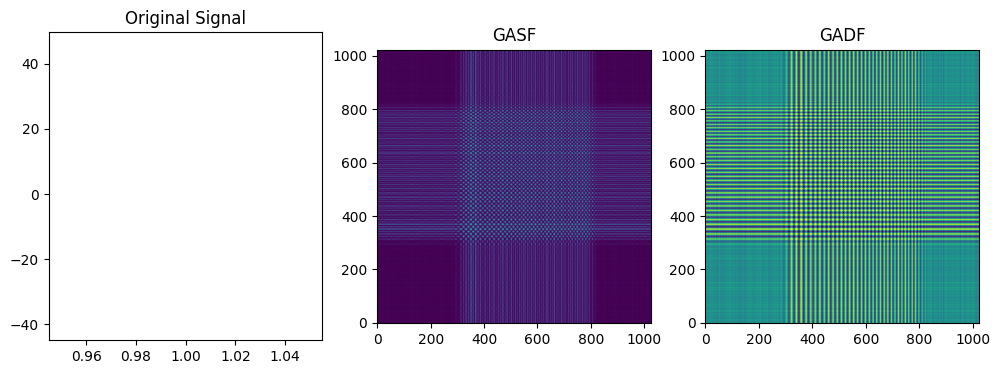

In [12]:
gasf_image, gadf_image = generate_gasf_gadf_images(signals[12256],image_size=1024)
t = np.linspace(1,1,2000)
t = t.reshape(1,2000)
# Plot the original signal, GASF, and GADF
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t, signals[12256])
plt.title('Original Signal')

plt.subplot(1, 3, 2)
plt.imshow(gasf_image, cmap='viridis', origin='lower')
plt.title('GASF')

plt.subplot(1, 3, 3)
plt.imshow(gadf_image, cmap='viridis', origin='lower')
plt.title('GADF')

plt.show()

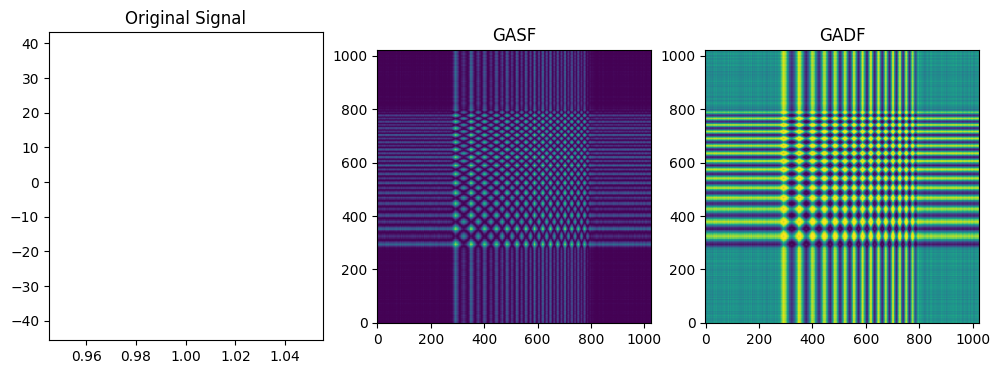

In [13]:
gasf_image, gadf_image = generate_gasf_gadf_images(signals[1],image_size=1024)
t = np.linspace(1,1,2000)
t = t.reshape(1,2000)
# Plot the original signal, GASF, and GADF
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t, signals[1])
plt.title('Original Signal')

plt.subplot(1, 3, 2)
plt.imshow(gasf_image, cmap='viridis', origin='lower')
plt.title('GASF')

plt.subplot(1, 3, 3)
plt.imshow(gadf_image, cmap='viridis', origin='lower')
plt.title('GADF')

plt.show()

### 一些小灵感
在对比实验中，要确定图片的最佳image_size是多少，这个可以水一下啊
可以测试对比512\*512，640\*640，1024\*1024，2048\*2048